<a href="https://colab.research.google.com/github/VISHVAPRASATHVS/CLUSTERING_ALGORITHMS/blob/main/mall_customer_clustering_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score

In [8]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual_Income_(k$),0
Spending_Score,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
encoder = LabelEncoder()
df['Genre'] = encoder.fit_transform(df['Genre'])
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [13]:
x = df.drop(['CustomerID','Genre'],axis = 1)
x.head()

,Age,Annual_Income_(k$),Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [14]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

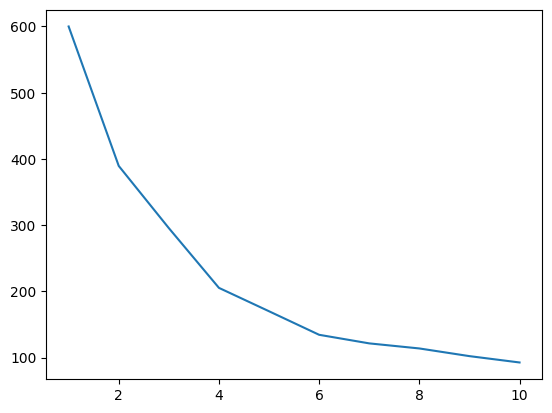

In [15]:
wcss = []
for k in range(1,11):
  temp_model = KMeans(n_clusters = k,init='k-means++',random_state = 42)
  temp_model.fit(x_scaled)
  wcss.append(temp_model.inertia_)
plt.plot(range(1,11),wcss)

In [16]:
model = KMeans(n_clusters = 5,init = 'k-means++',random_state = 42)
model.fit(x_scaled)

KMeans(n_clusters=5, random_state=42)

In [17]:
df['cluster'] = model.predict(x_scaled)
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,3
3,4,0,23,16,77,2
4,5,0,31,17,40,2


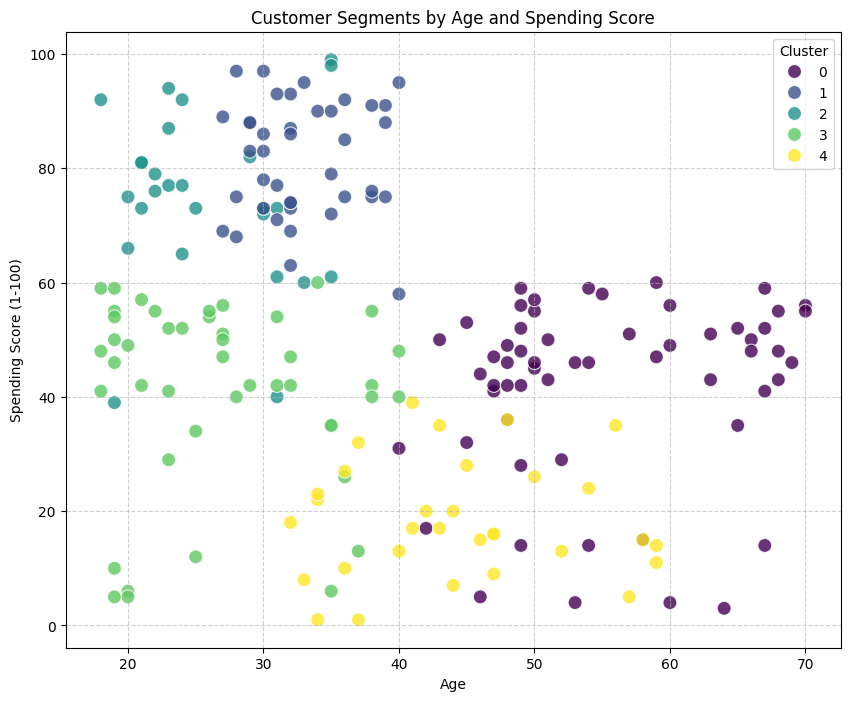

In [18]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster', data=df, palette='viridis', s=100, alpha=0.8)
plt.title('Customer Segments by Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Cluster')
plt.show()

In [21]:
silhouette_avg = silhouette_score(x_scaled, df['cluster'])
print(f"The Silhouette Score for the clustering is: {silhouette_avg:.3f}")

The Silhouette Score for the clustering is: 0.408


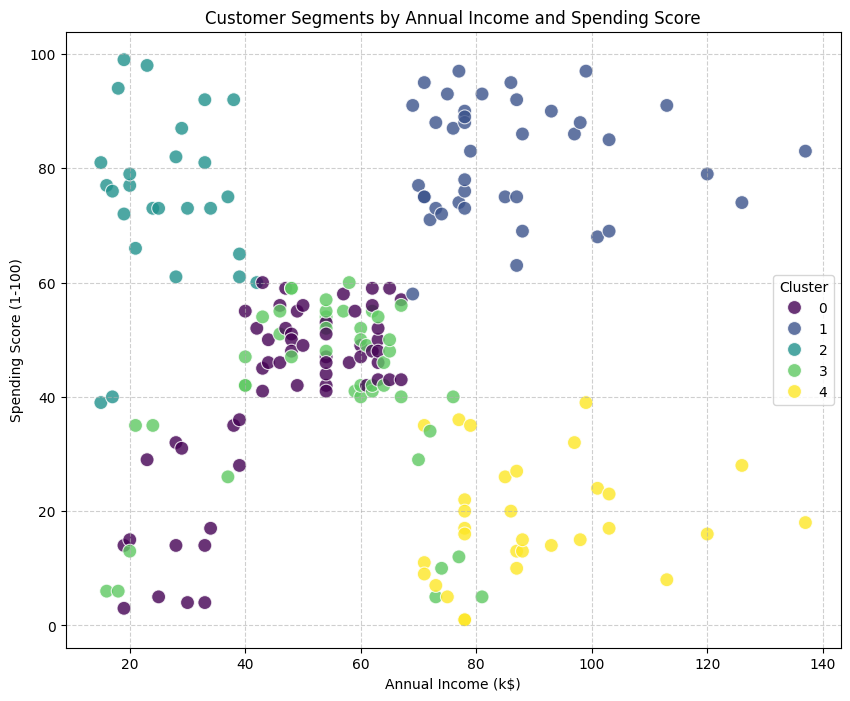

In [22]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score', hue='cluster', data=df, palette='viridis', s=100, alpha=0.8)
plt.title('Customer Segments by Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Cluster')
plt.show()

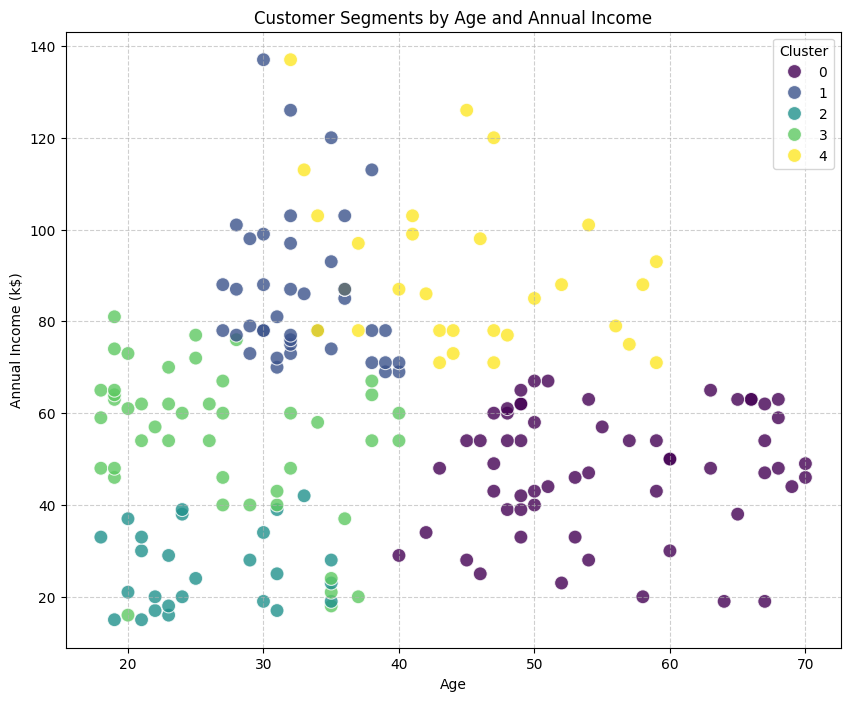

In [23]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='Annual_Income_(k$)', hue='cluster', data=df, palette='viridis', s=100, alpha=0.8)
plt.title('Customer Segments by Age and Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Cluster')
plt.show()

In [24]:
cluster_profiles = df.groupby('cluster')[['Age', 'Annual_Income_(k$)', 'Spending_Score']].mean()
print("Cluster Profiles:")
print(cluster_profiles)

Cluster Profiles:
               Age  Annual_Income_(k$)  Spending_Score
cluster                                               
0        55.275862           47.620690       41.706897
1        32.875000           86.100000       81.525000
2        25.769231           26.115385       74.846154
3        26.733333           54.311111       40.911111
4        44.387097           89.774194       18.483871
